In [1]:
from bs4 import BeautifulSoup
import requests
import re
import csv
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import math

import string, unicodedata
#import contractions
#import inflect

#from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [128]:
from time import sleep

In [171]:
TextData=pd.read_csv("processedData6Aug.csv")

In [244]:
TextData.head()

,Tokens,MsgSentenceTokens,NormTokens,POS_Msg,Sentiments,Sentiments2,stems,lemmas,articles,TFIDF
0,"['No', 'wonder', 'Jose', 'Mourinho', 'is', 'wo...",['No wonder Jose Mourinho is worried about the...,"['wonder', 'jose', 'mourinho', 'worried', 'sta...","[('wonder', 'NN'), ('jose', 'NN'), ('mourinho'...",1,-1.0,"['wond', 'jos', 'mourinho', 'worry', 'start', ...","['wonder', 'jose', 'mourinho', 'worry', 'start...",No wonder Jose Mourinho is worried about the s...,<FreqDist with 41 samples and 3972 outcomes>
1,"['Premier', 'League', 'clubs', 'are', 'facing'...",['Premier League clubs are facing a last minut...,"['premier', 'league', 'clubs', 'facing', 'last...","[('premier', 'JJR'), ('league', 'NN'), ('clubs...",-1,-1.0,"['premy', 'leagu', 'club', 'fac', 'last', 'min...","['premier', 'league', 'club', 'face', 'last', ...",Premier League clubs are facing a last minute ...,<FreqDist with 29 samples and 848 outcomes>
2,"['The', 'new', 'Premier', 'League', 'season', ...",['The new Premier League season has finally ar...,"['new', 'premier', 'league', 'season', 'finall...","[('new', 'JJ'), ('premier', 'NN'), ('league', ...",0,-1.0,"['new', 'premy', 'leagu', 'season', 'fin', 'ar...","['new', 'premier', 'league', 'season', 'finall...",The new Premier League season has finally arri...,<FreqDist with 41 samples and 24241 outcomes>
3,"['Manchester', 'United', 'have', 'held', 'talk...",['Manchester United have held talks with Bayer...,"['manchester', 'united', 'held', 'talks', 'bay...","[('manchester', 'NN'), ('united', 'VBD'), ('he...",-1,1.0,"['manchest', 'unit', 'held', 'talk', 'bayern',...","['manchester', 'unite', 'hold', 'talk', 'bayer...",Manchester United have held talks with Bayern ...,<FreqDist with 37 samples and 1595 outcomes>
4,"['Everton', 'have', 'agreed', 'a', '£28.5milli...",['Everton have agreed a £28.5million fee for B...,"['everton', 'agreed', '285million', 'fee', 'ba...","[('everton', 'NNS'), ('agreed', 'VBD'), ('285m...",1,1.0,"['everton', 'agree', '285million', 'fee', 'bar...","['everton', 'agree', '285million', 'fee', 'bar...",Everton have agreed a £28.5million fee for Bar...,<FreqDist with 34 samples and 1163 outcomes>


In [255]:
dataset={}
for index,item in TextData.iterrows():
    #print(str(index)+" "+item["Subject"])
    key=index
    value=str(item["articles"]).lower().replace('\r',"")
    dataset[key]=value

In [267]:
dataset1={}
for index,item in TextData.iterrows():
    #print(str(index)+" "+item["Subject"])
    key=index
    value=str(''.join(item["NormTokens"]).lower().replace('\r',""))
    dataset1[key]=value

{0: "no wonder jose mourinho is worried about the start of the new season. four days to go until it kicks off at old trafford and he is still waiting for the real manchester united to turn up. this has been a strange, disjointed few weeks for mourinho and his players, and it showed as they completed their pre-season on a muggy night in munich. on this evidence, whatever team united put out on friday night will struggle to overcome leicester never mind challenge manchester city's dominance of the premier league. bayern munich (3-4-3): neuer; kimmich (rudy 72), sule, hummels (boateng 46), alaba (bernat 56); martinez; robben, muller, thiago (rafinha 60), ribery; gnabry. subs: ulreich, hoffmann, lewandowski, boateng, goretzka, coman, mai, zylla, franzke. booked: boateng scorer: martinez 59 man utd (4-3-3): de gea (grant 78); darmian (jones 65), bailly (smalling 51), lindelof (tuanzebe 78), shaw (mitchell 78); herrera (garner 81), pereira, fred (chong 78); mata (mctominay 65), rashford (fos

In [257]:
def tf(data,filename):
    text=data[filename]
    tokens=nltk.word_tokenize(text)
    fd=nltk.FreqDist(tokens)
    return fd

In [258]:
def idf(data,term):
    count=[term in data[mail_no] for mail_no in data]
    inv_feq=math.log(len(count)/sum(count))
    return inv_feq

In [259]:
def tfidf(data,srno,n):
    term_scores={}
    file_fd=tf(data,srno)
    for term in file_fd:
        if term.isalpha():
            idf_val=idf(data,term)
            tf_val=tf(data,srno)[term]
            tfidf_val=tf_val*idf_val
            term_scores[term]=round(tfidf_val,2)
    return sorted(term_scores.items(),key=lambda x:-x[1])[:n]

In [260]:
myli=[]
for item in dataset:
    myli.append(tfidf(dataset,item,10))

In [261]:
df=pd.DataFrame({'TFIDF':myli})

In [262]:
df.head()

,TFIDF
0,"[(boateng, 14.28), (friday, 13.61), (martinez,..."
1,"[(click, 5.04), (leaves, 4.47), (resolved, 4.4..."
2,"[(fare, 75.46), (major, 73.07), (released, 61...."
3,"[(boateng, 14.28), (united, 7.52), (bayern, 6...."
4,"[(barcelona, 7.92), (virginia, 7.55), (digne, ..."


In [275]:
a=[]

In [276]:
a=TextData["NormTokens"][0]

In [279]:
a

"['wonder', 'jose', 'mourinho', 'worried', 'start', 'new', 'season', 'four', 'days', 'go', 'kicks', 'old', 'trafford', 'still', 'waiting', 'real', 'manchester', 'united', 'turn', 'strange', 'disjointed', 'weeks', 'mourinho', 'players', 'showed', 'completed', 'preseason', 'muggy', 'night', 'munich', 'evidence', 'whatever', 'team', 'united', 'put', 'friday', 'night', 'struggle', 'overcome', 'leicester', 'never', 'mind', 'challenge', 'manchester', 'city', 'dominance', 'premier', 'league', 'bayern', 'munich', '343', 'neuer', 'kimmich', 'rudy', '72', 'sule', 'hummels', 'boateng', '46', 'alaba', 'bernat', '56', 'martinez', 'robben', 'muller', 'thiago', 'rafinha', '60', 'ribery', 'gnabry', 'subs', 'ulreich', 'hoffmann', 'lewandowski', 'boateng', 'goretzka', 'coman', 'mai', 'zylla', 'franzke', 'booked', 'boateng', 'scorer', 'martinez', '59', 'man', 'utd', '433', 'de', 'gea', 'grant', '78', 'darmian', 'jones', '65', 'bailly', 'smalling', '51', 'lindelof', 'tuanzebe', '78', 'shaw', 'mitchell', '

In [238]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [246]:
vect = TfidfVectorizer(stop_words='english')

In [247]:
X = vect.fit_transform(TextData["NormTokens"])

In [249]:
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [248]:
X.shape

(87, 6803)

In [250]:
from sklearn import linear_model
from sklearn.decomposition import PCA

In [254]:
indices = np.argsort(vect.idf_)[::-1]
features = vect.get_feature_names()

top_n = 5
top_features = [features[i] for i in indices[:top_n]]
print (top_features)

['00']


In [252]:
indices

array([6802, 2853, 2841, ..., 4146, 6182, 5351], dtype=int64)

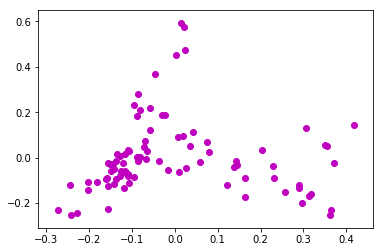

In [253]:
X_dense = X.todense()
coords = PCA(n_components=2).fit_transform(X_dense)
plt.scatter(coords[:, 0], coords[:, 1], c='m')
plt.show()